# answers 00: _Moriarty's game of chaos_

Welcome to MCB112, Python, and Jupyter Notebook!

The week 0 ("w00") pset is an example that gives you a walkthrough of what an MCB112 pset looks like, and a feeling for what we expect an answer to look like. Starting with w01, you'll be turning in your pset answers in the form of a single Jupyter Notebook page (a `.ipynb` file) like this one. Jupyter Notebook allows you to interleave Python code with text, written in Markdown format, a simple markup language for text.

This notebook will be way more wordy than you need to be in an answer though, because I'm going to explain a bunch of stuff in a lot of detail, for people who have never seen Python before. I will set these long explanations off in their own _explanations_ sections so they don't interrupt the flow _too_ much.



## our imports

In [ ]:
import numpy as np                    
import matplotlib.pyplot as plt

%matplotlib inline                     

## _explanation_

This example uses the [NumPy](https://numpy.org/doc/stable/index.html) module for scientific numeric computing, and the [matplotlib](https://matplotlib.org/) module for data visualization. The w01 pset will use only basic python, and you won't need to know or use NumPy or matplotlib until w02.

We will also get to the [Pandas](https://pandas.pydata.org/) data analysis module in w03, and some of the [SciPy](https://scipy.org/) module later in the course.

For each pset, we'll state which modules you can use. We don't want you to learn to code by googling and finding a bunch of random Python packages. At least not yet. There's a time and place for that, but get your fundamentals down first.

The `%matplotlib inline` sets your notebook page so it will render matplotlib figures as (static) images embedded in the notebook page. In fancier notebooks, you can use `%matplotlib widget` (among other options) to use _interactive_ plots. We're not going to do that, at least not for now.

## 1. "Write Python code with functions for..."

The pset conveniently suggested one good way of writing modular and reusable code. We can guess that we're going to have sequences that we read from the Genbank files and random sequences that we generate ourself, so we want to separate running the chaos game algorithm on an input sequence from the different ways we might obtain that sequence. It's also useful to separate _generating_ the data from _plotting_ the data, to make our plotting code easier to read, and easier to steal from in the future when we want to make some other kind of 2D scatterplot.

###  a) reading one DNA sequence from a Genbank format file



In [ ]:
def read_genbank_file(seqfile):
    """Read one sequence from a Genbank-format file.

    Input:  <seqfile>: path to a Genbank format file containing one DNA sequence.
    Output: <seq>:     sequence, as a list of upper-case characters (typically A|C|G|T)

    If the sequence contains characters other than A|C|G|T, such as degeneracy codes like N|R|Y, these will still be included.
    """
    in_sequence = False
    seq         = []
    with open(seqfile) as f:
        for line in f:
            if   line.startswith('//'):     break
            elif in_sequence:               seq.extend( [ x.upper() for x in line if x.isalpha() ] )
            elif line.startswith('ORIGIN'): in_sequence = True
    return seq
    

### _explanation_

If you're new to Python, the tricksiest line in this code was the line with `seq.extend()` on it. Let's dwell on that for a second because we can learn a fair amount of Python all at once.

`seq` is a **list**. You can see that because of how we initialize it (`seq = []`). We can look at the documentation for Python lists and see that we can add to them either one item at a time with `append()` or we can add a list of several items at once with `extend()`. Variables in Python (lists, and integers, and floats, and dicts, and whatever) are _objects_ with _methods_: so when we do something like `seq.extend()` we are saying "invoke the `extend()` method in the `seq` object", and the stuff in the parentheses is the argument to `extend()`: it will be interpreted as a list. 

Here, it's a list of the A|C|G|T characters on one line of the GenBank file. You can see us open the file (`open(seqfile) as f`) so that we have an open **file object** `f`, and then we're reading one line at a time from the file in a loop (`for line in f`) in a way where the variable `line` is a **string** containing something like "1240 ACGTACGATCAG ACGACTGATCTCA", because lines in Genbank files start with coordinates and also have spaces. We're waiting in the file until the sequence part is about to start (after a line that says 'ORIGIN'), and we stop when there's a line that says '//', by checking `line` with a string method `.startswith()` that tests for exact matching to a query string at the start of `line`. So that's what the `in_sequence` flag is doing: it gets set to `True` when we're in the sequence part of the file.

OK, back to the argument to `seq.extend()`, which needs to be a list, but `line` is a string, not a list. We also want to skip the coordinates and the spaces in the line, and only extend `seq` with a list of A|C|G|T characters on `line`. We can iterate over each character in `line` with a for loop: `for x in line`. We could write a few lines of code to initialize a new list, iterate over each character x in `line`, check whether the character is A|C|G|T before we include it, and convert the character to upper case (if it's a lower-case a|c|g|t), but we can do all of this very compactly using something called a **list comprehension**. If we did `[x for x in line]` we would get a list of the characters in `line`. The first `x` there is "put this thing in the new list..." and the `for x in line` is "... for each successive x in line". We can put anything we want into the new list as we do the `for x in line`, including some sort of operation on `x`: here, we're using the `x.upper()` method to convert `x` to upper case. Finally, Python's list comprehension syntax allows us to append an `if` test for each iteration of the for loop: here, `if x.isalpha()`, where `isalpha()` is a method with no argument that returns True if `x` is an alphabetic character: this is the piece of our code that is skipping spaces and numbers.

Whew. Got that?

No, it would be easy to still be confused. How should you figure this out as you're learning? The technique I advise to use throughout the course (and indeed throughout life) is, whatever you're trying to understand, create the smallest possible example where you know what the answer is supposed to be, and make sure you can do that first. Then move outwards to more and more complex things, once you've nailed the small things. And in the case of Python: use a lot of print statements when you do it.

So here's an example; let's peel apart that list comprehension in a code block of its own in our Markdown, where we can play.



In [ ]:
line = '120 ACT gat'                # Forget all the Genbank file stuff. Make sure we can turn this one little line into list('ACTGAT').
print( type(line) )                 # The built-in method type() is your friend for figuring out what things are: here, line is a `str` class
L    = [x for x in line]            # Simple list comprehension. 
print( type(L) )                    # The result L is a list of the characters in `line`
print (L)      
L    = [ 'hey!' for x in line ]     # Nothing sacred about that first x. We can put anything into the new list as we iterate through `line`
print (L)
L    = [ x.upper() for x in line ]  # but usually it would be something to do with the `x` we're iterating over in line, of course
print (L)
L    = [ x.upper() for x in line if x.isalpha() ]   # and finally here's what we did to make the argument we passed to `seq.extend()`
print (L)
L    = list('ACTGAT')               # if it weren't for the numbers and spaces - converting a string to a list is easy with `list()`
print (L)


A notebook cell like that is a (mostly) safe space where you can try different things, run the cell, and see the result quickly. 

(I say "mostly" safe because if you change variables that you're using somewhere else in the notebook, you can break things.)

Now back to our regular programming...

### b) doing the chaos game algorithm

In [ ]:
def chaos_game(seq):
    """Given a DNA sequence, produce a chaos game representation, as a 2D array of coordinates

    Input:  <seq> : a list or array of A|C|G|T characters
    Output: 2D numpy array of shape (L x 2): array of 2D coords for each of L points

    Assumes that the <seq> list only contains A|C|G|T characters.
    """
    vertices = { 'A' : [0, 0], 'C': [0,1], 'G': [1,1], 'T': [1,0] }
    L = len(seq)

    data = np.zeros( (L,2) )
    data[0] = vertices[seq[0]]
    for i in range(1,L):
        data[i] = (data[i-1] + vertices[seq[i]]) / 2
    return data
    

### _explanation_

One thing to notice here is that `data[i]` is row `i` of a 2D matrix, so `data[i]` is itself a vector of length 2. Meanwhile we've created `vertices` to be a dict, indexed by the four DNA characters: `vertices['A']` is a vector of length 2, the coords of the 'A' vertex. So when we do `data[i] + vertices[seq[i]]`, we are doing **vector addition**, an example of something that NumPy excels at both in syntax and in internal speed. Add some `type()` and `print()` statements in there to watch it work - or again, create an isolated small example in a new cell:


In [ ]:
D = np.array( [ [0.1, 0.1 ],       # Make a small example of the Lx2 array
                [0.2, 0.2 ], 
                [0.3, 0.3 ] ] )
vertex = np.array([0.5, 0.5])     # and an example vertex
print(type(D))                    # `D` is a numpy array
print(D.shape)                    #   ... of "shape" 3x2
print(type(D[1]))                 # `D[1]` is one row of the array.. but still just another numpy array
print(D[1].shape)                 #   ... now of shape 1x2, but since it's a vector, numpy interprets it as `2,`
print(type(vertex))               # `vertex` is also a numpy array
print(vertex.shape)               #   ... also of shape `2,`
r = D[1] + vertex                 # the two vectors have the same shape, so we can add them, elementwise
print (r)


And let's also have a closer look at `vertices`. Are you confused about Python `dict` versus `list` objects? I sure was at first. The key idea is the following:

A `list` is an ordered set of `n` elements (of any type) that you index by **position** `0..n-1` in the list: `L[i]` gives you the i'th element in `L`.

A `dict` is an unordered set of elements (of any type) that you index by a **string**: `D['A']` gives you the element in `D` that you indexed with key `A`.

So I used a dict for `vertices` because I wanted to say `vertices['C']`, looking up the coords for the `C` vertex using `C` itself as the index. 

Again, play with creating and manipulating lists and dicts in an isolated cell:

In [ ]:
L = [ 10, 20, 30 ]						         	# lists: initialization
D = { 'Holmes': 'postdoc', 'Watson': 'student' }  	# dicts: initialization
print(L[1])
print(D['Holmes'])
L.append(40)                              # append to the end of a list
print(L)
D['Wiggins'] = 'Baker Street Irregular'   # add element to a dict
print(D)

and again back to our regular programming...

### c) plotting the chaos game data


In [ ]:
def plot_chaos(data):
    """Create a scatterplot figure from an Lx2 array of chaos game points

    Input <data>: Lx2 array of coords for L points
    Result:       an inline figure in our notebook
    """
    fig, ax = plt.subplots()                                                # Creates Figure, Axes objects to plot in
    ax.scatter(data[:,0], data[:,1], s=0.1, marker='.', color='black')      # scatter plot with black points of size 0.1

    ax.text(0, 1, 'C', horizontalalignment='right')                         # here we're labeling A,C,G,T vertices
    ax.text(1, 1, 'G')
    ax.text(0, 0, 'A', verticalalignment='top', horizontalalignment='right')
    ax.text(1, 0, 'T', verticalalignment='top')

    ax.axis('equal')      # make sure the plot is shown as a square, not a rectangle
    ax.set_axis_off()     # turn off everything associated with the axes: tick marks, labels, spines

    fig.tight_layout()    # tighten margins, reduce unnecessary white space


### _explanation_

One thing to notice here: `data[:,0]` is what's called a **slice** of an array. matplotlib (and Pandas) are very column-oriented in how they think about 2D data tables. The scatter plot function `ax.scatter()` expects to get a list/array of `n` x coordinates and a corresponding list of `n` y coordinates for the points it will plot; but our data are in an Lx2 array. `data[:,0]` is the syntax for "give me all of the rows" (that's the ':') and give me just column 0 (that's the '0'): i.e., extract the X coords as a single array. `data[:,1]` are the y coords. You know the drill: look up array slicing, make a small example in an isolated cell, and play with lots of print statements.

matplotlib is big and complicated and I won't say much about it for now; best to start with their tutorial, to understand the syntax. But here's one thing to know up front. There are two main ways of using matplotlib. In one way, you basically assume that you're just making a simple single figure, and you directly call matplotlib functions with `plt.` prefixes, like `plt.plot()`. The other way is "object oriented", where you create and manipulate Figure and Axes objects. That's what I'm doing here: creating a Figure and Axes object for my figure with `fig, ax = plt.subplots`, and then using object-oriented methods calls on those objects with things like `ax.scatter()` to create and design my plot. I recommend following this pattern and using the object-oriented style, becuse it's easier to control in something like a jupyter notebook where you have lots of figures at once. I _don't_ recommend mixing the two styles, which is what you will get if you learn matplotlib by googling StackOverflow.

OK, enough with the code explanations. We can proceed with the biology now.

## 2. Reproduce Moriarty's three phage results

I've downloaded the Genbank files `BabyGotBac.gb`, `Dwayne.gb`, and `Tiamoceli.gb` into the same directory as my Jupyter notebook, so the notebook can find them.

### BabyGotBac

In [ ]:
seq = read_genbank_file('BabyGotBac.gb')
D   = chaos_game(seq)
plot_chaos(D)

#### Dwayne

In [ ]:
seq = read_genbank_file('Dwayne.gb')
D   = chaos_game(seq)
plot_chaos(D)

### Tiamoceli

In [ ]:
seq = read_genbank_file('Tiamoceli.gb')
D   = chaos_game(seq)
plot_chaos(D)

OK, we've reproduced Moriarty's plots. Now to figure out what's making these cool patterns.

## 3. Figure out what determines these patterns, using synthetic random DNA sequences as tests

Those controls we glimpsed on Moriarty's screen were a big clue. What happens if we leave out one of the four nucleotides? Let's generate a sequence consisting only of, say, A|C|T, leaving out G:

In [ ]:
seq = np.random.choice(list('ACT'), size=(50000))
D   = chaos_game(seq)
plot_chaos(D)

That might seem a little puzzling at first until you realize those aren't blank triangles per se; they are a recursive pattern made out of smaller and smaller empty squares. The upper right "G" quadrant is all blank. The upper right subquadrant of all the other quadrants is also blank. And so on down infinitum. 

Change which nucleotide you leave out and re-run the cell. The blank quadrant is always the missing nucleotide.

Moriarty's other control was to make a DNA sequence that's missing a _di_nucleotide. He chose the CG dinucleotide because it's famously strongly depleted in many genomes, including the human genome. (People call the dinucleotide "CpG", emphasizing the phosphate covalent linkage in the DNA strand with that "p", to distinguish CpG content from G+C% single base composition.)

You can't just sample a DNA sequence 2 nucleotides at a time to eliminate CpG (by which I mean, make the DNA in steps of 2, from 15 of the 16 dinucleotides), because you'll make CpG's at the junctions - for example AC followed by GT creates a CG. You have to be a little more clever. One way is to use a _Markov model_ -- specifically, a first order Markov model, where "first order" means the nucleotide $x_i$ we generate depends on _one_ previous nucleotide $x_{i-1}$. A 2nd order Markov model would generate $x_i$ conditional on _two_ previous nucleotides $x_{i-2}, x_{i-1}$, and so on. We parameterize a 1st order Markov model with a 4x4 table of probabilities $P(a | b)$, for the probability of each base $a$ when it follows a context of each previous base $b$. (We'll learn more about probability notation in week 02, and about Markov models in week 05.)

So here's an example of generating random DNA from a 1st order Markov model where I've hand-set the parameters:

In [ ]:
p = [ [ 0.25, 0.25, 0.25, 0.25 ],   # P(x | A), where x = {A,C,G,T}.
      [ 1/3,  1/3,  0.0,  1/3  ],   # P(x | C) ... here I've set P(G|C) = 0 to disallow CpG dinucs
      [ 0.25, 0.25, 0.25, 0.25 ],   # and so on
      [ 0.25, 0.25, 0.25, 0.25 ],
    ]
alphabet = list('ACGT')
L        = 50000

seq = ['A']   # I could've been more random about choosing the initial nucleotide... but let's just make it an A,
prv = 0       # it doesn't matter for this visualization, the other 49,999 points dominate the view
for i in range(1,L):
    cur = np.random.choice(4, p=p[prv])     # The p= optional argument to np.random.choice() lets me provide my own probabilities
    seq.append(alphabet[cur])               # <cur>, <prv> are integers 0..3, so I have to convert to an A|C|G|T letter with alphabet[cur]
    prv = cur

D = chaos_game(seq)
plot_chaos(D)


The biggest square that's missing is the upper left subquadrant of the upper right quadrant. We just saw that if our sequence doesn't have any G's in it, it has no points in the upper right "G" quadrant. Now we see that if our sequence doesn't have any CpG's in it, it has no points in the upper left "C" subquadrant of the upper right "G" quadrant.

We're starting to get the picture. The squares of different sizes correspond to subsequences of different lengths ("k-mers", of different lengths k), and the position of the square corresponds to which k-mer it is.


OK, what happens when we generate a sequence that's missing a particular 4-mer? 

Here's a really cheapo, quick and dirty way to do it... which happens to help us learn a little Python about how to edit lists. We'll generate a uniformly random sequence, but then sweep through the sequence and replace every occurrence of the kmer-to-eliminate with another sequence - carefully choosing that sequence so it can't accidentally create the kmer at the junctions of the sequences around it.

In [ ]:
kmer     = list('CCAG')
new_kmer = list('TTTT')
k        = len(kmer)
L        = 50000
seq      = list(np.random.choice(list('ACGT'), size=(50000)))

for i in range(L-k+1):
    if seq[i:i+4] == kmer: seq[i:i+4] = new_kmer

D = chaos_game(seq)
plot_chaos(D)
    

That's informative. "CCAG" is in the upper right G quadrant, lower right A subquadrant, upper right C sub-subquadrant, upper right C sub-sub-quadrant, in a little square of $\frac{1}{4}^4$ area: that square is blank. And so are smaller squares corresponding to the 5-mers ACCAG, CCCAG, GCCAG, TCCAG that end in CCAG. And so on recursively.

We can also see that we caused extra darkening around the T vertex because we created a bunch of extra T-rich k-mers with our dumb trick of replacing CCAG with TTTT.

The idea that the chaos game is a recursive representation of the k-mer composition of the sequence, for all lengths k at once, is illustrated here (in a figure taken from Goldman (1993); full reference and link at the end of the notes):

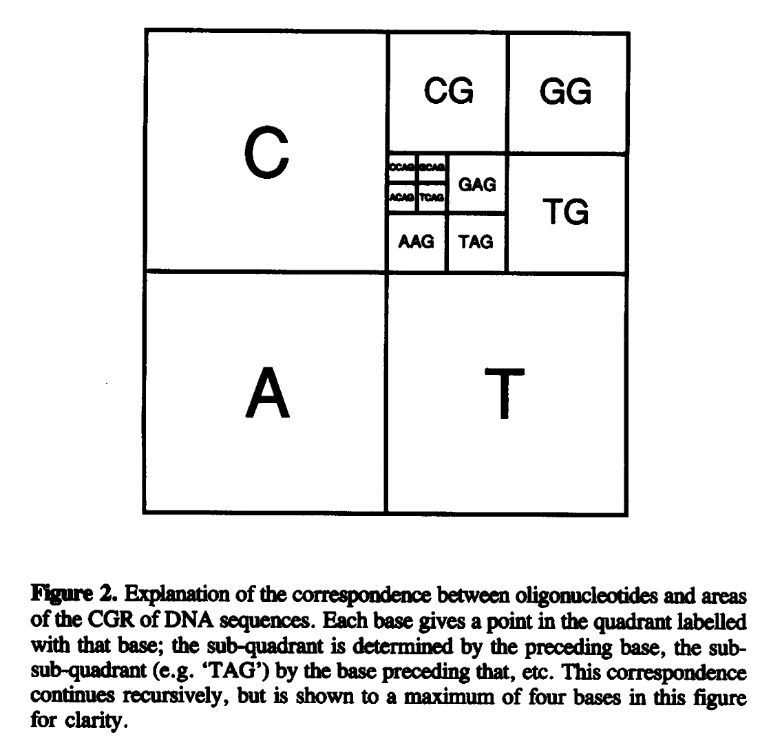


Just to beat a dead horse, while learning a little more Python... let's create a sequence that consists of _only_ repeats of CCAG. We expect this to have four different 4-mers, because of overlaps: CCAG, CAGC, AGCC, and GCCA. And if you think about it, there's only four different 5-mers too (CCAGC, CAGCC, AGCCA, GCCAG), and so on... so if we're right, we expect to get a chaos game representation that has just four spots in it.

In [ ]:
seq = list('CCAG') * 10000
D = chaos_game(seq)
plot_chaos(D)

Yup, four points, and in the right places if we stare at them long enough. Empirically anyway, I think we can call it a day. 

Can we prove it? Mathematically, how does it work?

Suppose our last point was at coordinates $(x_{i-1}, y_{i-1})$ and the next base $s_i$ is an A, so we're going to move halfway to the $(0,0)$ vertex. We know $x_{i-1}$ must be $ 0 \leq x_{i-1} \leq 1 $ (because it's in the square); so when we move halfway toward the $(0,0)$ vertex, the $x_i$ coord now must be $ 0 \leq x_i \leq 0.5 $. Same argument holds for $ 0 \leq y_{i} \leq 0.5 $. Thus we know that when $s_i$ is A, no matter where the previous point was, our new point $(x_i,y_i)$ must go to the lower left "A" quadrant. With some tedious notation, we could then prove this idea recursively for the subquadrants on down.

## 4. Design an experiment to test the idea by randomizing the three phage genomes

So a killer experiment is to randomize the genomes preserving k-mer composition (for some choice we make for a small k), so we would be randomizing away any more complex "hidden language" in the sequence. 

It's easy to shuffle the bases in the sequence independently (e.g. for k=1). (Actually, I take that back. There are a bunch of ways to shuffle a sequence that are subtly wrong and don't get you a uniformly random shuffle. For the right algorithm, look up the [Fisher-Yates algorithm](https://en.wikipedia.org/wiki/Fisher%E2%80%93Yates_shuffle). If you use something like `np.random.shuffle()`, that's what it's doing.) It's harder to shuffle in a way that exactly preserves dinucleotide composition; the algorithm for that is called Altschul-Erickson. It can be extended to higher orders if needed.

For our purposes we don't need an exact shuffle; to make the point, we can use an approximation, and generate DNA sequences that have the same k-mer composition probabilities. We've already seen a 1st order Markov model above, which models dinucleotide composition statistics. So for modeling k-mer composition for arbitrary k, we want a k-1'th order Markov model. If we want to show that the chaos game patterns are almost entirely explicable in terms of 3-mer or 4-mer statistics, we can generate randomized DNA sequence from a 2nd or 3rd order Markov model, parameterized with the composition statistics of the original Genbank sequences.

But if I showed you code for doing that, then I'd give away too much of the week 05 pset, where we're going to learn about Markov models! So I'm going to cheat. As Julia Child would say, here's some randomized DNA sequences I prepared earlier. Download these four files to your directory:

* [BabyGotBac.shuf-k3](http://mcb112.org/w00/BabyGotBac.shuf-k3)   DNA sequence generated with 3-mer statistics of BabyGotBac, using a 2nd order Markov model
* [Dwayne.shuf-k3](http://mcb112.org/w00/Dwayne.shuf-k3)     ... and Dwayne, randomized preserving statistical 3-mer composition
* [Tiamoceli.shuf-k3](http://mcb112.org/w00/Tiamoceli.shuf-k3)  ... and Tiamoceli
* [BabyGotBac.shuf-k4](http://mcb112.org/w00/BabyGotBac.shuf-k4)  ... and BabyGotBac again but preserving 4-mer statistics

And now let's see their chaos game plots:

In [ ]:
seq = read_genbank_file('Dwayne.shuf-k3')
D   = chaos_game(seq)
plot_chaos(D)

First up is Dwayne, with its strong horizontal striping... which is pretty much exactly reproduced using the randomized DNA sequence with its 3-mer statistics. For whatever reason, phage Dwayne is avoiding all of the 3-mers that are all A+T: it is strongly depleted for AAA, ATA, ATT, TTA, etc.

In [ ]:
seq = read_genbank_file('Tiamoceli.shuf-k3')
D   = chaos_game(seq)
plot_chaos(D)

Next we have Tiamoceli, with its X patterns - also pretty much exactly reproduced from its 3-mer statistics. I'm not sure exactly what's going on here; it's worth doing a little more work. I think it's avoiding polypyrimidine and polypurine runs: sequences like CTCTCTCTC and AGAGAGAGA, that would put kmers along the diagonal of the chaos plot.

In [ ]:
seq = read_genbank_file('BabyGotBac.shuf-k3')
D   = chaos_game(seq)
plot_chaos(D)

And finally BabyGotBac. This isn't quite the same pattern! BabyGotBac has two prominent strongly-depleted squares that (according to our hypothesis) correspond to missing 4-mers, not 3-mers; specifically, the two most striking holes correspond to missing GGAG and its reverse complement CTCC. So that suggests we need to look at a 4-mer composition-preserving randomization:

In [ ]:
seq = read_genbank_file('BabyGotBac.shuf-k4')
D   = chaos_game(seq)
plot_chaos(D)

and indeed now those holes appear. Just to put the original plot up again for comparison:


In [ ]:
seq = read_genbank_file('BabyGotBac.gb')
D   = chaos_game(seq)
plot_chaos(D)

## Summary

The "chaos game representation" is a recursive representation of the k-mer composition of the sequence, for all lengths k at once. Each k-mer is represented by a subsquare, with longer k-mers represented in smaller squares.

## _Further reading_

The chaos game is for real!  Two papers in the early 1990's introduced the chaos game representation of DNA sequences without fully understanding what was making all the interesting patterns, and then a paper by Nick Goldman showed what was going on, primarily by using sequence randomizations like the ones above. 

* H.J. Jeffrey, ["Chaos game representation of gene structure"](https://doi.org/10.1093/nar/18.8.2163), Nucl. Acids Res. 18:2163-2170 (1990).
* H.J. Jeffrey, ["Chaos game visualization of sequences"](https://doi.org/10.1016/0097-8493(92)90067-6), Comput. & Graphics 16:25-33 (1992).
* N. Goldman, ["Nucleotide, dinucleotide and trinucleotide frequencies explain patterns observed in chaos game representations of DNA sequences"](https://doi.org/10.1093/nar/21.10.2487), Nucl. Acids Res. 21:2487-2491 (1993).
